# LETSGROWMORE || SUSHANT MALHOTRA

# TASK 2: STOCK MARKET PREDICTION

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [128]:
df=pd.read_csv('sds.txt')

In [129]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [130]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [16]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


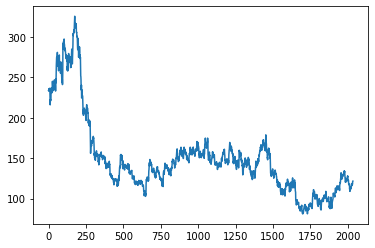

In [17]:
plt.plot(df["Close"])
plt.show()

In [57]:
X=df.drop(columns=["Close","Date"])

In [58]:
Y=df["Close"]

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [88]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [89]:
model.fit(xtrain,ytrain)

LinearRegression()

In [90]:
model.coef_

array([-6.56874135e-02,  9.09708574e-02,  9.93751699e-02,  8.75121720e-01,
        6.37749990e-09, -6.78208012e-06])

In [91]:
model.score(xtest,ytest)

0.9999435387291117

In [92]:
xtest

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
1383,138.70,140.40,137.20,137.95,3963491,5496.04
1161,152.85,152.85,150.40,152.00,1117786,1695.44
1246,152.20,153.20,148.20,150.50,1524759,2300.84
1254,138.10,140.65,136.70,139.20,1088398,1510.77
338,149.80,151.15,147.20,147.95,1098727,1636.02
...,...,...,...,...,...,...
467,123.00,125.35,117.25,119.80,3058329,3676.04
551,134.00,135.00,132.70,133.10,1689644,2259.91
505,138.35,141.70,137.85,139.70,3029995,4235.35
1587,119.65,120.50,117.00,117.70,1334337,1583.86


In [87]:
ytrain


1864     97.65
1689     89.75
1633    113.05
1595    117.40
1216    163.25
         ...  
477     139.95
1067    153.00
1400    143.90
356     151.70
1345    140.55
Name: Close, Length: 1424, dtype: float64

In [65]:
ypred=model.predict(xtest)

In [71]:
ypred.size

611

In [73]:
model.score(xtest,ypred)

1.0

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(np.sqrt(mean_squared_error(ytest,ypred)))
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred)*100)

0.3927443836573369
0.28585861149311154
99.99395386868727
